# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...
...,...
995,✅ Trip Verified | Johannesburg to London. I t...
996,✅ Trip Verified | Singapore to London Heathro...
997,✅ Trip Verified | London to Los Angeles. Book...
998,✅ Trip Verified | Miami to London Heathrow. A...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df['reviews'] = df['reviews'].apply(lambda review: review.split('|', 1)[-1].strip() if '|' in review else review)
df
    

,reviews
0,Easy check in a T5. Galleries south and North ...
1,"Flight delayed by an hour, it happens, no bigg..."
2,The staff are very rude and not trained proper...
3,Good domestic flight operated by BA Cityflyer....
4,Failed at all basic travel fundamentals: 1) Ou...
...,...
995,Johannesburg to London. I tend to stay with an...
996,Singapore to London Heathrow. It's my first ti...
997,London to Los Angeles. Booked this trip eight ...
998,Miami to London Heathrow. As with many others ...


In [5]:
import re
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
#Lowercasing: 
#Convert all text to lowercase before further analysis. This ensures that words are treated consistently regardless of their case.
df['Cleaned Reviews'] = df['Cleaned Reviews'].str.lower()
df.head()

,reviews,Cleaned Reviews
0,Easy check in a T5. Galleries south and North ...,easy check in a t galleries south and north lo...
1,"Flight delayed by an hour, it happens, no bigg...",flight delayed by an hour it happens no biggie...
2,The staff are very rude and not trained proper...,the staff are very rude and not trained proper...
3,Good domestic flight operated by BA Cityflyer....,good domestic flight operated by ba cityflyer ...
4,Failed at all basic travel fundamentals: 1) Ou...,failed at all basic travel fundamentals our fl...


In [6]:
#Stopword Removal: Remove common stopwords from the text data.
#Stopwords are words that don't carry significant meaning and are often removed to focus on more meaningful words.
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(remove_stopwords)
df

You should consider upgrading via the 'C:\Users\dc\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,Cleaned Reviews
0,Easy check in a T5. Galleries south and North ...,easy check galleries south north lounges packe...
1,"Flight delayed by an hour, it happens, no bigg...",flight delayed hour happens biggie us change g...
2,The staff are very rude and not trained proper...,staff rude trained properly exceptions made ch...
3,Good domestic flight operated by BA Cityflyer....,good domestic flight operated ba cityflyer gro...
4,Failed at all basic travel fundamentals: 1) Ou...,failed basic travel fundamentals flight delaye...
...,...,...
995,Johannesburg to London. I tend to stay with an...,johannesburg london tend stay airline frequent...
996,Singapore to London Heathrow. It's my first ti...,singapore london heathrow first time traveling...
997,London to Los Angeles. Booked this trip eight ...,london los angeles booked trip eight months pr...
998,Miami to London Heathrow. As with many others ...,miami london heathrow many others posted revie...


In [7]:
#Lemmatization: Lemmatization reduces words to their base or root form. It's useful for collapsing words with similar meanings.
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['Lemmatized'] = df['Cleaned Reviews'].apply(lemmatize_text)
df

,reviews,Cleaned Reviews,Lemmatized
0,Easy check in a T5. Galleries south and North ...,easy check galleries south north lounges packe...,easy check gallery south north lounge packed a...
1,"Flight delayed by an hour, it happens, no bigg...",flight delayed hour happens biggie us change g...,flight delayed hour happens biggie u change ga...
2,The staff are very rude and not trained proper...,staff rude trained properly exceptions made ch...,staff rude trained properly exception made chi...
3,Good domestic flight operated by BA Cityflyer....,good domestic flight operated ba cityflyer gro...,good domestic flight operated ba cityflyer gro...
4,Failed at all basic travel fundamentals: 1) Ou...,failed basic travel fundamentals flight delaye...,failed basic travel fundamental flight delayed...
...,...,...,...
995,Johannesburg to London. I tend to stay with an...,johannesburg london tend stay airline frequent...,johannesburg london tend stay airline frequent...
996,Singapore to London Heathrow. It's my first ti...,singapore london heathrow first time traveling...,singapore london heathrow first time traveling...
997,London to Los Angeles. Booked this trip eight ...,london los angeles booked trip eight months pr...,london los angeles booked trip eight month pre...
998,Miami to London Heathrow. As with many others ...,miami london heathrow many others posted revie...,miami london heathrow many others posted revie...


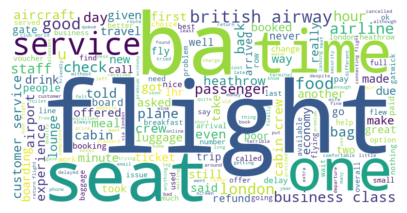

In [26]:

#Word Clouds:
#Start with word clouds as a simple and visual way to get a high-level understanding of the most frequent words in your reviews. 
#Word clouds can give you a sense of the common themes and topics in your data without requiring complex analysis.
#They are great for quick insights and can help you identify any immediate patterns or trends.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Lemmatized']))
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
#Sentiment Analysis:
#After generating word clouds, move on to sentiment analysis. 
#This will help you understand the overall sentiment expressed in the reviews—whether they are positive, negative, or neutral. 
#Sentiment analysis can provide a general overview of customer opinions and feelings about the subject of the reviews,
#which can be valuable for businesses looking to gauge customer satisfaction.'

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Lemmatized'].apply(get_sentiment)
df

,reviews,Cleaned Reviews,Lemmatized,Sentiment
0,Easy check in a T5. Galleries south and North ...,easy check galleries south north lounges packe...,easy check gallery south north lounge packed a...,0.188062
1,"Flight delayed by an hour, it happens, no bigg...",flight delayed hour happens biggie us change g...,flight delayed hour happens biggie u change ga...,0.225000
2,The staff are very rude and not trained proper...,staff rude trained properly exceptions made ch...,staff rude trained properly exception made chi...,-0.300000
3,Good domestic flight operated by BA Cityflyer....,good domestic flight operated ba cityflyer gro...,good domestic flight operated ba cityflyer gro...,0.236111
4,Failed at all basic travel fundamentals: 1) Ou...,failed basic travel fundamentals flight delaye...,failed basic travel fundamental flight delayed...,-0.265714
...,...,...,...,...
995,Johannesburg to London. I tend to stay with an...,johannesburg london tend stay airline frequent...,johannesburg london tend stay airline frequent...,0.218564
996,Singapore to London Heathrow. It's my first ti...,singapore london heathrow first time traveling...,singapore london heathrow first time traveling...,0.134848
997,London to Los Angeles. Booked this trip eight ...,london los angeles booked trip eight months pr...,london los angeles booked trip eight month pre...,0.002128
998,Miami to London Heathrow. As with many others ...,miami london heathrow many others posted revie...,miami london heathrow many others posted revie...,0.230556


In [12]:
#Vader Analysis
def vader_analysis(value):
    if value >= 0.5:
        return 'Positive'
    elif value < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df
    

,reviews,Cleaned Reviews,Lemmatized,Sentiment,Analysis
0,Easy check in a T5. Galleries south and North ...,easy check galleries south north lounges packe...,easy check gallery south north lounge packed a...,0.188062,Neutral
1,"Flight delayed by an hour, it happens, no bigg...",flight delayed hour happens biggie us change g...,flight delayed hour happens biggie u change ga...,0.225000,Neutral
2,The staff are very rude and not trained proper...,staff rude trained properly exceptions made ch...,staff rude trained properly exception made chi...,-0.300000,Negative
3,Good domestic flight operated by BA Cityflyer....,good domestic flight operated ba cityflyer gro...,good domestic flight operated ba cityflyer gro...,0.236111,Neutral
4,Failed at all basic travel fundamentals: 1) Ou...,failed basic travel fundamentals flight delaye...,failed basic travel fundamental flight delayed...,-0.265714,Negative
...,...,...,...,...,...
995,Johannesburg to London. I tend to stay with an...,johannesburg london tend stay airline frequent...,johannesburg london tend stay airline frequent...,0.218564,Neutral
996,Singapore to London Heathrow. It's my first ti...,singapore london heathrow first time traveling...,singapore london heathrow first time traveling...,0.134848,Neutral
997,London to Los Angeles. Booked this trip eight ...,london los angeles booked trip eight months pr...,london los angeles booked trip eight month pre...,0.002128,Neutral
998,Miami to London Heathrow. As with many others ...,miami london heathrow many others posted revie...,miami london heathrow many others posted revie...,0.230556,Neutral


In [13]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Neutral     637
Negative    338
Positive     25
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b0590b83a0>,
 [Text(-0.4589560614028997, 0.9996796155276638, 'Neutral'),
  Text(0.3791073717263073, -1.0326071860600097, 'Negative'),
  Text(1.3458384165307498, -0.10591957604713309, 'Positive')],
 [Text(-0.25033966985612705, 0.5452797902878166, '63.7%'),
  Text(0.20678583912344034, -0.5632402833054598, '33.8%'),
  Text(0.8473797437415831, -0.06669010343708379, '2.5%')])

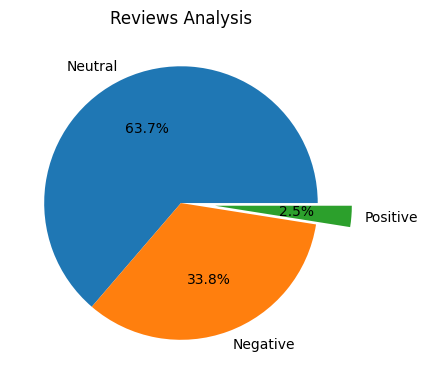

In [14]:
#Visual Representation

plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [24]:
#Topic Modeling:
#Finally, perform topic modeling to uncover underlying topics or themes within the reviews. 
#This involves identifying clusters of words that tend to co-occur together and assigning those clusters as topics. 
#Topic modeling can provide deeper insights into the specific issues, subjects, or aspects that customers are discussing in their reviews.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english', ngram_range=(1, 1))
X = vectorizer.fit_transform(df['Lemmatized'])
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X)

#Display topics
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:]     # Display top 10 words for each topic
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {i + 1}: {', '.join(top_words)}")

Topic 1: seat, service, airline, ticket, ba, british, airway, flight, customer, refund
Topic 2: customer, told, service, airport, day, bag, london, hour, ba, flight
Topic 3: time, class, cabin, good, crew, service, food, ba, seat, flight
Topic 4: check, amazing, wish, service, francisco, mexico, san, staff, terrible, city
Topic 5: cancelled, time, airway, british, london, voucher, heathrow, staff, ba, flight


In [25]:
df.to_csv("BA_reviews.csv")